<a href="https://colab.research.google.com/github/YannisZang/CS_5864/blob/main/HW1/Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 4: Hybrid images (10 points)

In this section of the assignment, you will explore the concept of hybrid images, which can create a visual effect where an image appears to be one thing when viewed up close and another when viewed from a distance. You will select a pair of images, preprocess them, apply Gaussian filtering, and combine them to create a hybrid image.

1.   Download one pair of images:
Choose either woman_happy.png Download woman_happy.pngand woman_neutral.png Download woman_neutral.pngor baby_happy.jpg Download baby_happy.jpgand baby_weird.jpg
2.   Read in the images and resize them to the same square size (e.g. 512x512 pixels). Convert both images to grayscale.



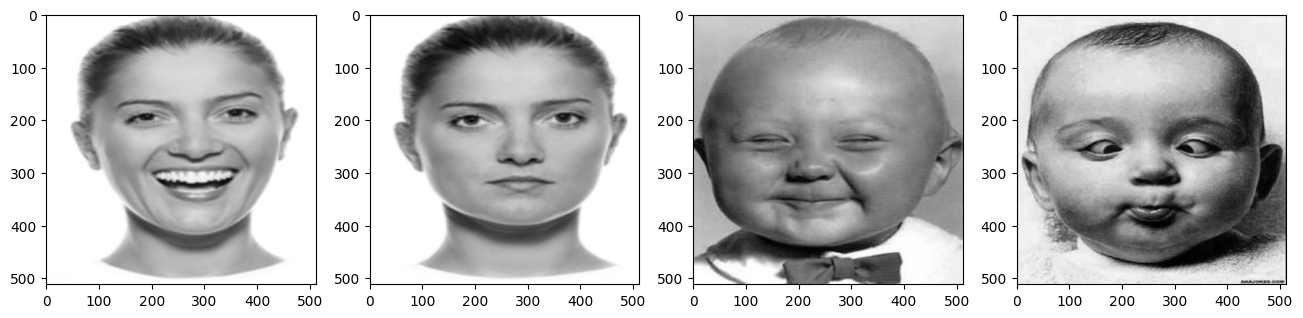

In [6]:
from skimage import io, color, transform
import matplotlib.pyplot as plt

def input_img(filepath):
  img = io.imread(filepath)
  if img.shape[-1] == 4:
    img = img[..., :3]
  img = transform.resize(img, (512, 512), anti_aliasing=True)
  return color.rgb2gray(img)


img_woman_happy = input_img(filepath="/content/sample_data/woman_happy.png")


img_woman_neutral = input_img(filepath="/content/sample_data/woman_neutral.png")


img_baby_happy = input_img(filepath="/content/sample_data/baby_happy.jpg")


img_baby_weird = input_img(filepath="/content/sample_data/baby_weird.jpg")

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(img_woman_happy, cmap="gray")

ax[1].imshow(img_woman_neutral, cmap="gray")

ax[2].imshow(img_baby_happy, cmap="gray")

ax[3].imshow(img_baby_weird, cmap="gray")




3.   Apply a Gaussian filter to the images. You should use your code for a Gaussian filter, but feel free to experiment with different values of . Show the resulting blurred images.




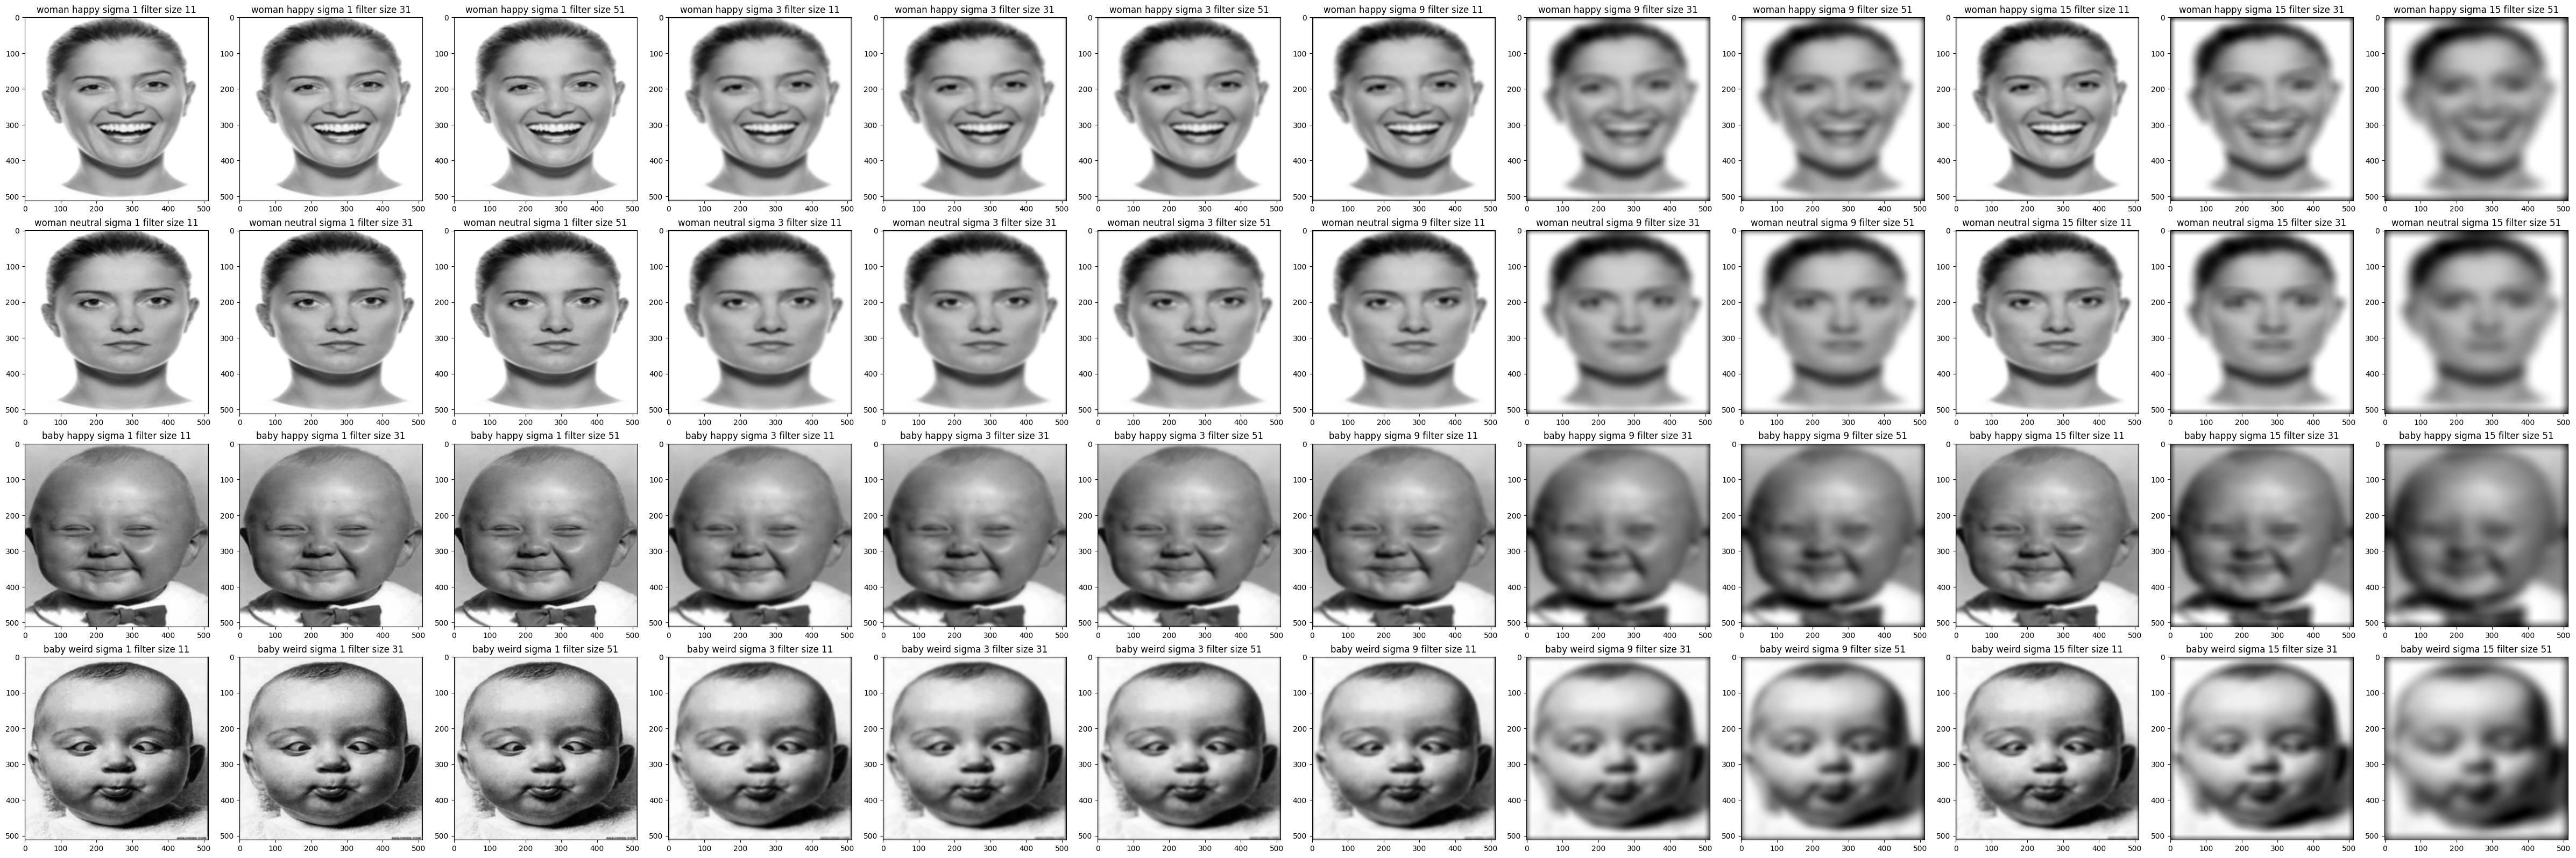

In [8]:
import numpy as np
from scipy import ndimage

# h(x, y)
def gaussian(x, y, sigma_x, sigma_y):
  return np.exp(-(x**2 / (2 * sigma_x**2) + y**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x * sigma_y)

# build filter
def gaussian_filter(size, sigma_x, sigma_y):
  radius = size // 2
  x, y = np.meshgrid(np.arange(-radius, radius+1), np.arange(-radius, radius+1))

  return gaussian(x, y, sigma_x, sigma_y)


sigmas = [1, 3, 9, 15]

sizes = [11, 31, 51]

filtered_img_wh = []
titles_img_wh = []
filtered_img_wn = []
titles_img_wn = []
filtered_img_bh = []
titles_img_bh = []
filtered_img_bw = []
titles_img_bw = []

for sigma in sigmas:
  for size in sizes:
    # 12 img in each list, total 48
    filtered_img_wh.append(ndimage.convolve(img_woman_happy, gaussian_filter(size, sigma, sigma), mode='constant', cval=0))
    titles_img_wh.append(f"woman happy sigma {sigma} filter size {size}")
    filtered_img_wn.append(ndimage.convolve(img_woman_neutral, gaussian_filter(size, sigma, sigma), mode='constant', cval=0))
    titles_img_wn.append(f"woman neutral sigma {sigma} filter size {size}")
    filtered_img_bh.append(ndimage.convolve(img_baby_happy, gaussian_filter(size, sigma, sigma), mode='constant', cval=0))
    titles_img_bh.append(f"baby happy sigma {sigma} filter size {size}")
    filtered_img_bw.append(ndimage.convolve(img_baby_weird, gaussian_filter(size, sigma, sigma), mode='constant', cval=0))
    titles_img_bw.append(f"baby weird sigma {sigma} filter size {size}")


fig, ax = plt.subplots(4, 12, figsize=(48, 16))

ax = ax.ravel()

for i in range(12):
  ax[i].imshow(filtered_img_wh[i], cmap="gray")
  ax[i].set_title(titles_img_wh[i])
  ax[i+12].imshow(filtered_img_wn[i], cmap="gray")
  ax[i+12].set_title(titles_img_wn[i])
  ax[i+24].imshow(filtered_img_bh[i], cmap="gray")
  ax[i+24].set_title(titles_img_bh[i])
  ax[i+36].imshow(filtered_img_bw[i], cmap="gray")
  ax[i+36].set_title(titles_img_bw[i])


plt.tight_layout()
plt.show()








4.   Obtain the detail image for one of the images by subtracting the blurred image from the original image. Show the result.


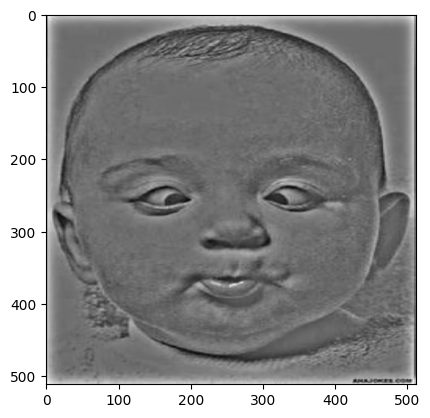

In [26]:
# blur img - sigma 9 filter size 51
detail_img = img_baby_weird - filtered_img_bw[8]

plt.imshow(detail_img, cmap="gray")
plt.show()


5.   Add the blurred image from one image to the detail image from the other. Show the result.


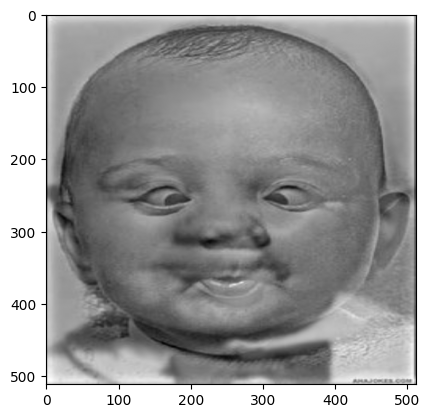

In [33]:
output_img = detail_img + filtered_img_bh[5]

plt.imshow(output_img, cmap="gray")
plt.show()



6.   Explore the hybrid image's "hybrid" effect by scaling it up and down. Show the result at different scales.




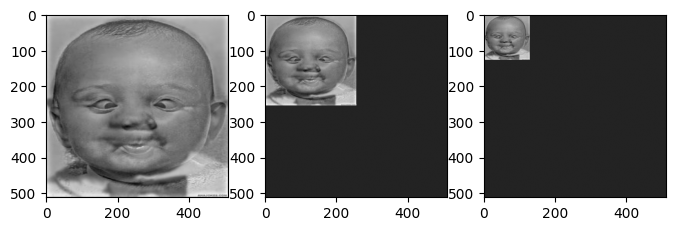

In [42]:
from skimage.transform import ProjectiveTransform, warp

sx = [1, 0.5, 0.25]

sy = [1, 0.5, 0.25]


img_scaling = []

for i in range(3):

  m = np.array([
      [sx[i], 0, 0],
      [0, sy[i], 0],
      [0, 0, 1]
  ])

  matrix_t = ProjectiveTransform(np.linalg.inv(m))

  img_scaling.append(warp(output_img, matrix_t))


fig, ax = plt.subplots(1, 3, figsize=(8, 24))

for i in range(len(img_scaling)):
  ax[i].imshow(img_scaling[i], cmap="gray")




